In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

sns.set()
# sns.set_palette(["#003f5c","#2f4b7c","#665191","#a05195","#d45087", "#f95d6a","#ff7c43","#ffa600"])
sns.set_palette("tab10")
models = [
    "bert-base-\nmultilingual-uncased",
    "tsdae-bert-base-\nmultilingual-uncased",
    "tsdae-bert-base-\nmultilingual-uncased_gpl_50s_70i",
    "hate-speech-slo",
    "tsdae-hate-\nspeech-slo",
    "tsdae-hate_speech\n_slo_gpl_100s_50i",
    "all-MiniLM-L12-v2",
    "tsdae-all-\nMiniLM-L12-v2",
    "tsdae-all-MiniLM\n-L12-v2_gpl_100s_50i"
]

base_models = ["bert-base-multilingual-uncased", "hate_speech_slo", "all-MiniLM-L12-v2"]
tsdae_models = ["tsdae-bert-base-multilingual-uncased", "tsdae-hate_speech_slo", "tsdae-all-MiniLM-L12-v2"]
tsdae_gpl_models = ["tsdae-bert-base-multilingual-uncased_gpl_50s_70i", "tsdae-hate_speech_slo_gpl_100s_50i", "tsdae-all-MiniLM-L12-v2_gpl_100s_50i"]


In [66]:
df = pd.read_csv('../scores.csv')
print(df.columns)

Index(['Model', 'F1', 'Log-Loss'], dtype='object')


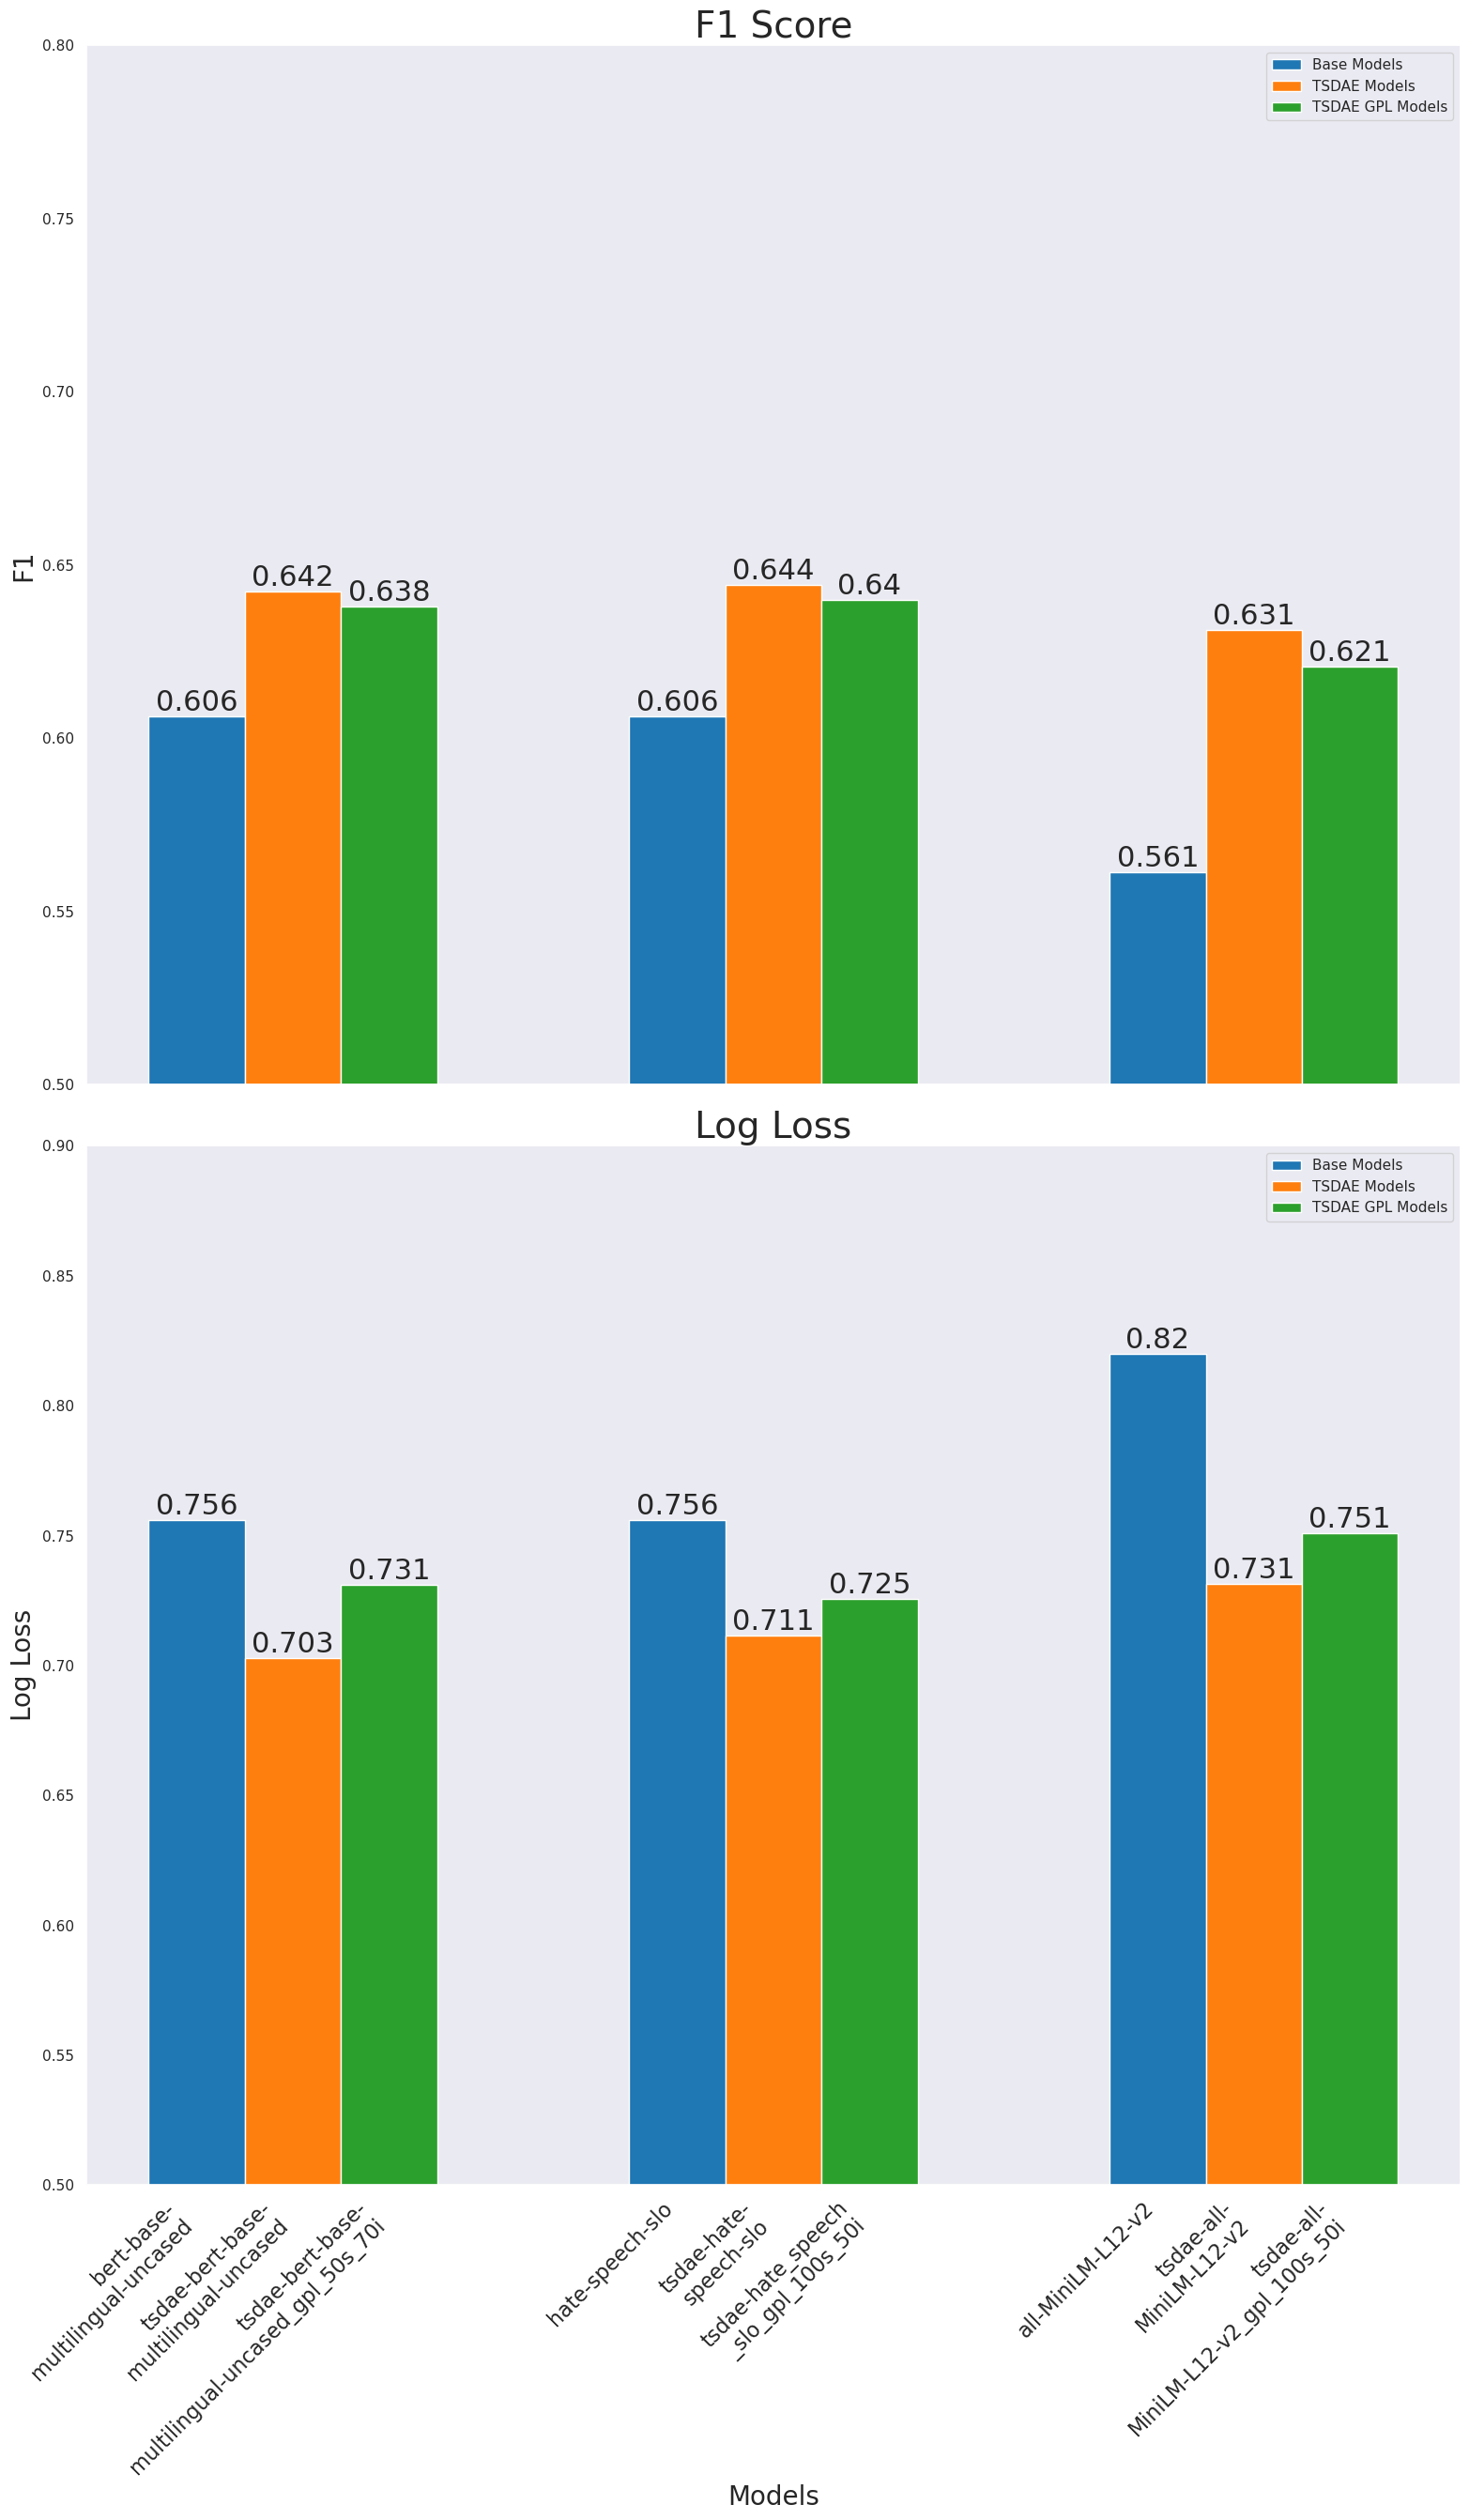

In [81]:
fig, ax = plt.subplots(2, 1, figsize=(16, 27), sharex=True)
index = np.arange(3)
bar_width = 0.2

ax[0].grid(False)
ax[1].grid(False)


bars1 = ax[0].bar(index, df[df["Model"].isin(base_models)]['F1'], bar_width, label='F1 Score')
bars2 = ax[0].bar(index+bar_width, df[df["Model"].isin(tsdae_models)]['F1'], bar_width, label='F1 Score')
bars5 = ax[0].bar(index+2*bar_width, df[df["Model"].isin(tsdae_gpl_models)]['F1'], bar_width, label='F1 Score')
ax[0].set_title('F1 Score', fontsize=28)
ax[0].set_ylim(0.5, 0.8)
ax[0].set_ylabel('F1', fontsize=20)
ax[0].set_xticks([0, bar_width, 2* bar_width, 1, 1+bar_width, 1+2*bar_width, 2, 2+bar_width, 2+2*bar_width])

ax[0].set_xticklabels(models, rotation=45, ha="right", fontsize=16)

for bar in bars1 + bars2 + bars5:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() , round(bar.get_height(), 3), ha='center', va='bottom', fontsize=22)


bars3=ax[1].bar(index, df[df["Model"].isin(base_models)]['Log-Loss'], bar_width, label='Base Models Log Loss')
bars4 = ax[1].bar(index+bar_width, df[df["Model"].isin(tsdae_models)]['Log-Loss'], bar_width, label='TSDAE Models Log Loss')
bars6 = ax[1].bar(index+2*bar_width, df[df["Model"].isin(tsdae_gpl_models)]['Log-Loss'], bar_width, label='TSDAE Models Log Loss')
ax[1].set_title('Log Loss', fontsize=28)
ax[1].set_ylim(0.5, 0.9)
ax[1].set_xlabel('Models', fontsize=20)
ax[1].set_ylabel('Log Loss', fontsize=20)
ax[1].set_xticks([0, bar_width, 2* bar_width, 1, 1+bar_width, 1+2*bar_width, 2, 2+bar_width, 2+2*bar_width])
for bar in bars3 + bars4+bars6:
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() , round(bar.get_height(), 3), ha='center', va='bottom', fontsize=22)

ax[1].set_xticklabels(models, rotation=45, ha="right", fontsize=16)

ax[0].legend(['Base Models', 'TSDAE Models', "TSDAE GPL Models"])
ax[1].legend(['Base Models', 'TSDAE Models', "TSDAE GPL Models"])

plt.tight_layout()

# plt.savefig('../reports/fig/tsdae_base.pdf')